In [236]:
import pandas as pd
import json, matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize

In [237]:
SFCrime = pd.DataFrame.from_csv('Map__Crime.csv', index_col=None)
#AllCrime = pd.read_json('SFCrimeData.json')
SFCrime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,50436712,ASSAULT,BATTERY,Wednesday,04/20/2005 12:00:00 AM,04:00,MISSION,NONE,18TH ST / CASTRO ST,-122.435003,37.760888,"(37.7608878061245, -122.435002864271)"
1,80049078,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Sunday,01/13/2008 12:00:00 AM,18:00,PARK,NONE,1100 Block of CLAYTON ST,-122.446838,37.762255,"(37.7622550270122, -122.446837820235)"
2,130366639,ASSAULT,AGGRAVATED ASSAULT WITH A KNIFE,Sunday,05/05/2013 12:00:00 AM,04:10,INGLESIDE,"ARREST, BOOKED",0 Block of SGTJOHNVYOUNG LN,-122.444707,37.724931,"(37.7249307267936, -122.444707063455)"
3,30810835,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Tuesday,07/08/2003 12:00:00 AM,01:00,SOUTHERN,"ARREST, BOOKED",MASON ST / TURK ST,-122.408954,37.783288,"(37.7832878735491, -122.408953598286)"
4,130839567,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,10/04/2013 12:00:00 AM,20:53,TENDERLOIN,"ARREST, BOOKED",TURK ST / LEAVENWORTH ST,-122.414056,37.782793,"(37.7827931071006, -122.414056291891)"


In [238]:
SFC = SFCrime

In [239]:
#1) Finding the largest commited offense
CN = SFCrime.sort('Category')
CN = CN.groupby(['Category']).size()
CN.sort_values().tail()

C:\Users\sub\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


Category
VEHICLE THEFT     113808
ASSAULT           164515
NON-CRIMINAL      199750
OTHER OFFENSES    267982
LARCENY/THEFT     383468
dtype: int64

Time
19:00    35157
17:00    36036
18:00    41111
00:01    47746
12:00    48687
dtype: int64

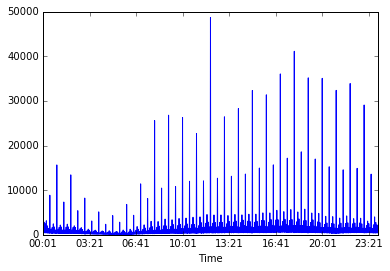

In [240]:
#2) finding the most active time for offenses
time = SFCrime.groupby(['Time']).size()
time.plot()
time.sort_values().tail()

In [241]:
#2a) What crime is most commited around noon(11:00-13:00)
CrimeTime = SFC[(SFC.Time >= "11:00")&(SFC.Time <"13:00")]
CrimeTime = CrimeTime.groupby('Category').size().sort_values()
CrimeTime.tail(1)

Category
LARCENY/THEFT    38965
dtype: int64

In [242]:
#3) Most crime active day for Larceny/Theft of the week
date = SFCrime[SFCrime.Category == 'LARCENY/THEFT']
date = date.groupby('DayOfWeek').size().sort_values()
date
#date.plot(type='scatter')

DayOfWeek
Monday       51027
Sunday       52772
Tuesday      52917
Wednesday    53938
Thursday     54030
Saturday     59315
Friday       59469
dtype: int64

In [243]:
#4) most active district by day of week
ad = SFC.groupby(['PdDistrict']).size().sort_values()
ad

PdDistrict
RICHMOND       96838
PARK          106776
TARAVAL       141283
INGLESIDE     168665
TENDERLOIN    171364
CENTRAL       185444
BAYVIEW       189944
NORTHERN      227434
MISSION       254077
SOUTHERN      337350
dtype: int64

In [244]:
#5) Description of Crime
OutCome = SFC.groupby(['Descript'])
OutCome.size().sort_values()

Descript
SAFE BURGLARY OF A RESIDENCE WITH EXPLOSIVES                   1
REFUSAL TO IDENTIFY                                            1
UNSOLICITED FAX ADVERTISING                                    1
FALSE REPRESENTATION TO SECONDHAND DEALER                      1
ROBBERY, VEHICLE FOR HIRE, ATT., W/ KNIFE                      1
ENCOURAGE MINOR TO USE OPIATES                                 1
HAZARDOUS MATERIALS, TRANSPORT WITHOUT PERMIT                  1
HAZARDOUS MATERIALS, STORE WITHOUT PERMIT                      1
BOMBING OF POLICE BUILDING                                     1
BIGAMY, INCEST, AND THE CRIME AGAINST NATURE (GENERAL)         1
ASSAULT TO ROB BANK WITH A GUN                                 1
BURGLARY,HOTEL UNDER CONSTRUCTION, ATT. FORCIBLE               1
ASSAULT TO ROB ON THE STREET W/DEADLY WEAPON                   1
TRANSPORTATION OF OPIUM                                        1
ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ FULL AUTO           1
ASSAULT, AGGRAVA

In [245]:
#6) Resolution for crimes
OutCome = SFC.groupby(['Resolution'])
OutCome.size().sort_values()

Resolution
PROSECUTED FOR LESSER OFFENSE                  82
CLEARED-CONTACT JUVENILE FOR MORE INFO        583
JUVENILE DIVERTED                             686
JUVENILE ADMONISHED                          3004
EXCEPTIONAL CLEARANCE                        3661
PROSECUTED BY OUTSIDE AGENCY                 5069
JUVENILE CITED                               6579
NOT PROSECUTED                               7680
DISTRICT ATTORNEY REFUSES TO PROSECUTE       7954
COMPLAINANT REFUSES TO PROSECUTE             8086
JUVENILE BOOKED                             11730
UNFOUNDED                                   21057
PSYCHOPATHIC CASE                           29154
LOCATED                                     34435
ARREST, CITED                              154621
ARREST, BOOKED                             443277
NONE                                      1141518
dtype: int64

In [246]:
#7) from the Resolutions find out which category and resolution go hand in hand for Larceny/theft
Verd = SFC[(SFC.Category == 'LARCENY/THEFT') & (SFC.PdDistrict =='SOUTHERN')]
Verd = Verd.groupby('Resolution').size().sort_values()
Verd

Resolution
CLEARED-CONTACT JUVENILE FOR MORE INFO        2
JUVENILE DIVERTED                             4
PSYCHOPATHIC CASE                             5
LOCATED                                      11
PROSECUTED BY OUTSIDE AGENCY                 37
JUVENILE ADMONISHED                          41
COMPLAINANT REFUSES TO PROSECUTE             60
DISTRICT ATTORNEY REFUSES TO PROSECUTE       63
EXCEPTIONAL CLEARANCE                       145
JUVENILE BOOKED                             169
UNFOUNDED                                   303
JUVENILE CITED                              362
NOT PROSECUTED                              505
ARREST, CITED                              3065
ARREST, BOOKED                             6646
NONE                                      81110
dtype: int64

In [247]:
#8) Recent Year high crime involving Largeny/Theft (2015)
import datetime 
years = []
year = SFC[(SFC.Category == 'LARCENY/THEFT') & (SFC.PdDistrict =='SOUTHERN')]
year = SFC.Date
for i in year:
    d = datetime.datetime.strptime(i, "%m/%d/%Y %I:%M:%S %p") 
    d = '{0:%Y}'.format(d,"%Y")
    years.append(float(d))

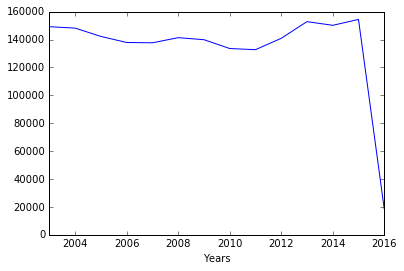

In [248]:
# 8 plot
newyears = pd.DataFrame(years)
newyears.columns = ['Years']
newyears = newyears.groupby('Years').size()
newyears.plot()